## Plotting functions

This notebook demonstrates how to use basic plotting functions offered by Seaborn.
Since Seaborn offers such powerful and easy-to-use functions for plotting, it was
decided that no wrappers are created for them, at least for now. Instead, the functions
are simply made available in *basic_plots_seaborn* module of EIS Toolkit.

In this notebook, examples of all the plot types included in this module are demonstrated.
For documentation and other examples, refer to Seaborne's documentation: https://seaborn.pydata.org/api.html

In [1]:
from matplotlib import pyplot as plt

import seaborn as sns
import sys
sys.path.insert(0, "..")
from eis_toolkit.exploratory_analyses.basic_plots_seaborn import (
    histogram,
    barplot,
    boxplot,
    kdeplot,
    lineplot,
    pairplot,
    scatterplot,
    ecdfplot,
    heatmap,
    regplot
)
from eis_toolkit.exploratory_analyses.statistical_tests import correlation_matrix
from eis_toolkit.validation.plot_correlation_matrix import plot_correlation_matrix

In [2]:
# Load datasets
penguins = sns.load_dataset("penguins")
geyser = sns.load_dataset("geyser")
iris = sns.load_dataset("iris")
glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")

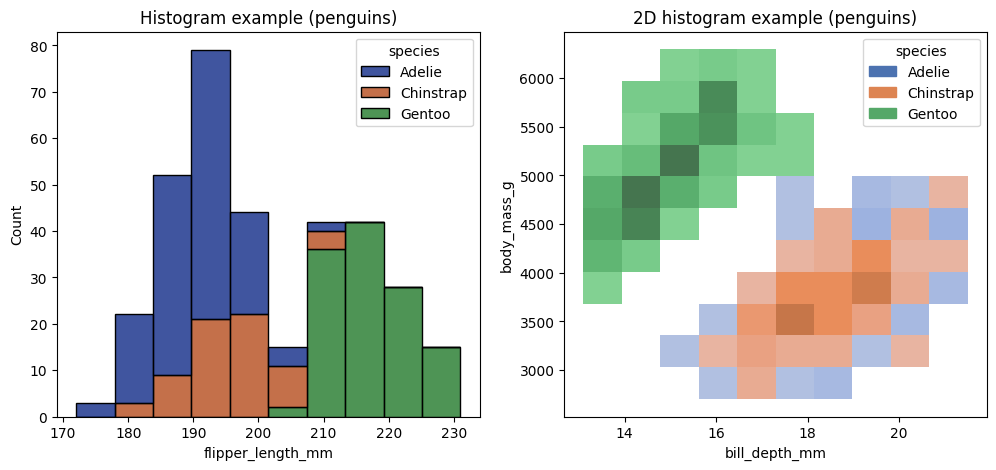

In [3]:
# HISTOGRAM PLOT
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

histogram(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", palette="dark", ax=ax[0]).set_title("Histogram example (penguins)")
histogram(penguins, x="bill_depth_mm", y="body_mass_g", hue="species", palette="deep", ax=ax[1]).set_title("2D histogram example (penguins)")

plt.show()

Text(0.5, 1.0, 'KDE example 2 (penguins)')

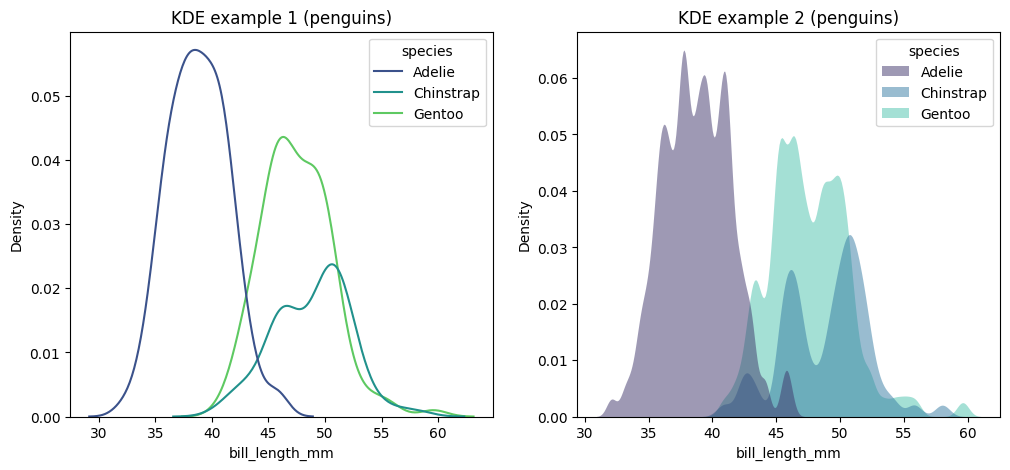

In [4]:
# KDE plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

kdeplot(penguins, x="bill_length_mm", hue="species", ax=ax[0], palette="viridis").set_title("KDE example 1 (penguins)")
kdeplot(penguins, x="bill_length_mm", hue="species", ax=ax[1], bw_adjust=0.4, fill=True, alpha=0.5, linewidth=0, palette="mako").set_title("KDE example 2 (penguins)")

Text(0.5, 1.0, 'ECDF example (penguins)')

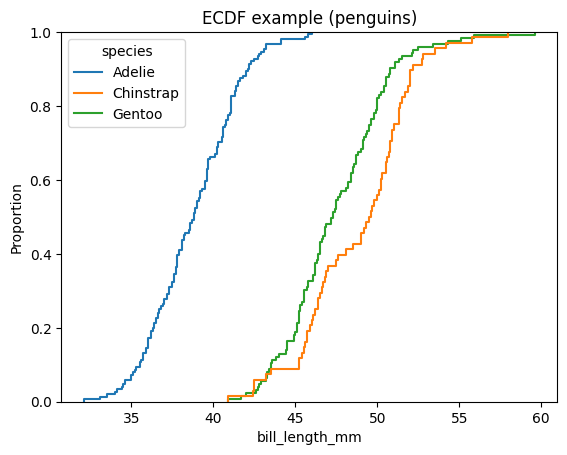

In [5]:
# ECDF plot
ecdfplot(data=penguins, x="bill_length_mm", hue="species").set_title("ECDF example (penguins)")

Text(0.5, 1.0, 'Bar plot example (penguins)')

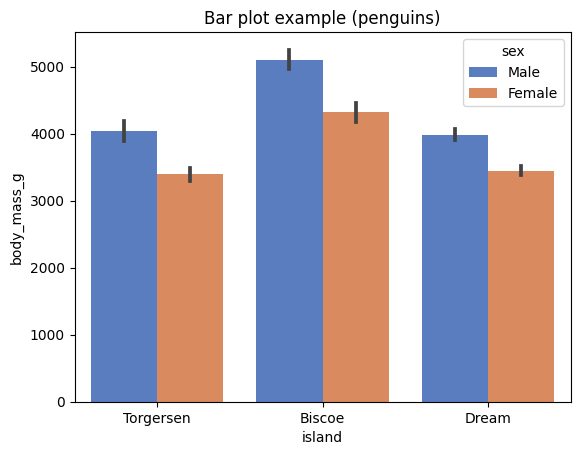

In [6]:
# BAR PLOT
barplot(penguins, x="island", y="body_mass_g", hue="sex", palette="muted").set_title("Bar plot example (penguins)")

Text(0.5, 1.0, 'Lineplot example (geysers)')

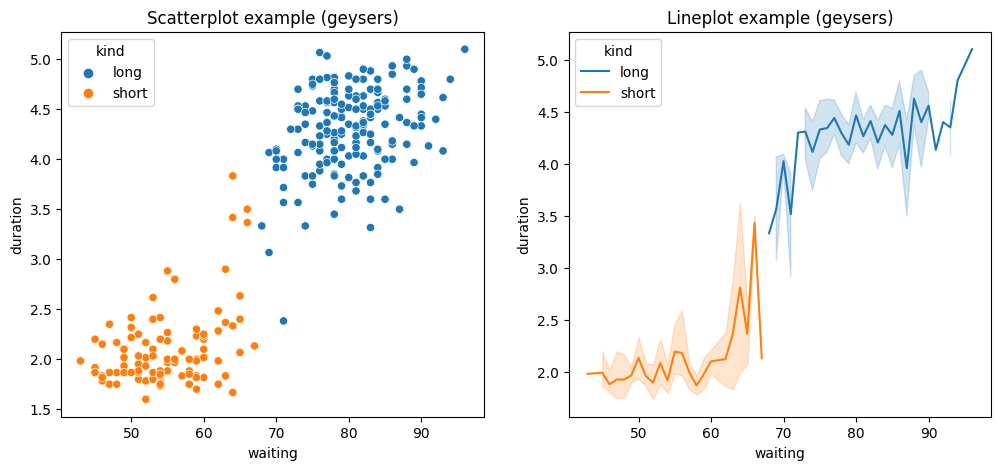

In [7]:
# SCATTERPLOT AND LINEPLOT
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
scatterplot(geyser, x="waiting", y="duration", hue="kind", ax=ax[0]).set_title("Scatterplot example (geysers)")
lineplot(geyser, x="waiting", y="duration", hue="kind", ax=ax[1]).set_title("Lineplot example (geysers)")

Text(0.5, 1.0, 'Regression plot example 2 (penguins)')

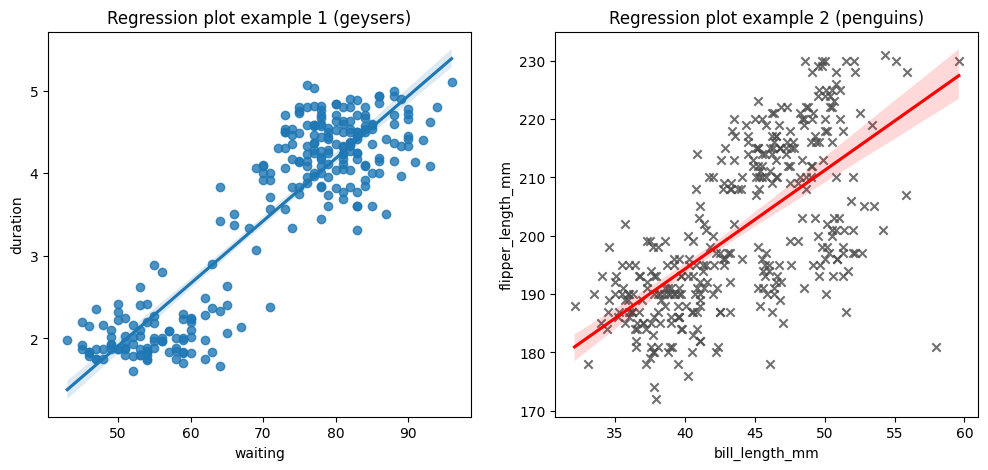

In [8]:
# REGRESSION PLOT

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
regplot(geyser, x="waiting", y="duration", ax=ax[0]).set_title("Regression plot example 1 (geysers)")
regplot(penguins, x="bill_length_mm", y="flipper_length_mm", marker="x", color=".3", line_kws=dict(color="r"), ax=ax[1]).set_title("Regression plot example 2 (penguins)")

Text(0.5, 1.0, 'Boxplot example (planets)')

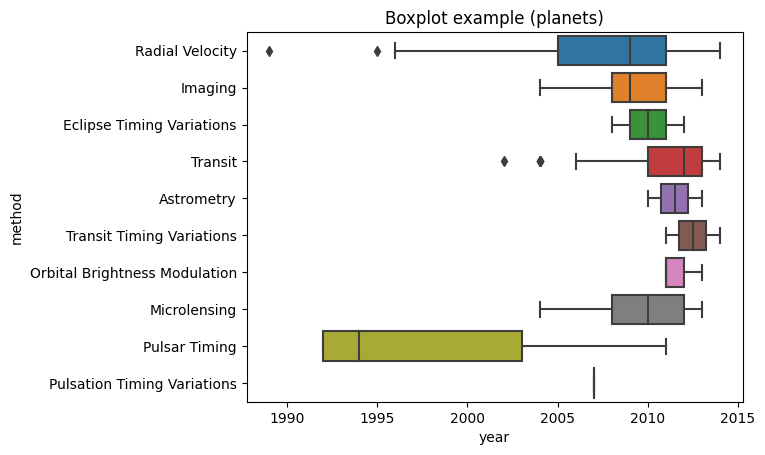

In [9]:
# BOXPLOT
planets = sns.load_dataset("planets")

boxplot(planets, y="method", x="year").set_title("Boxplot example (planets)")

/home/niko/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


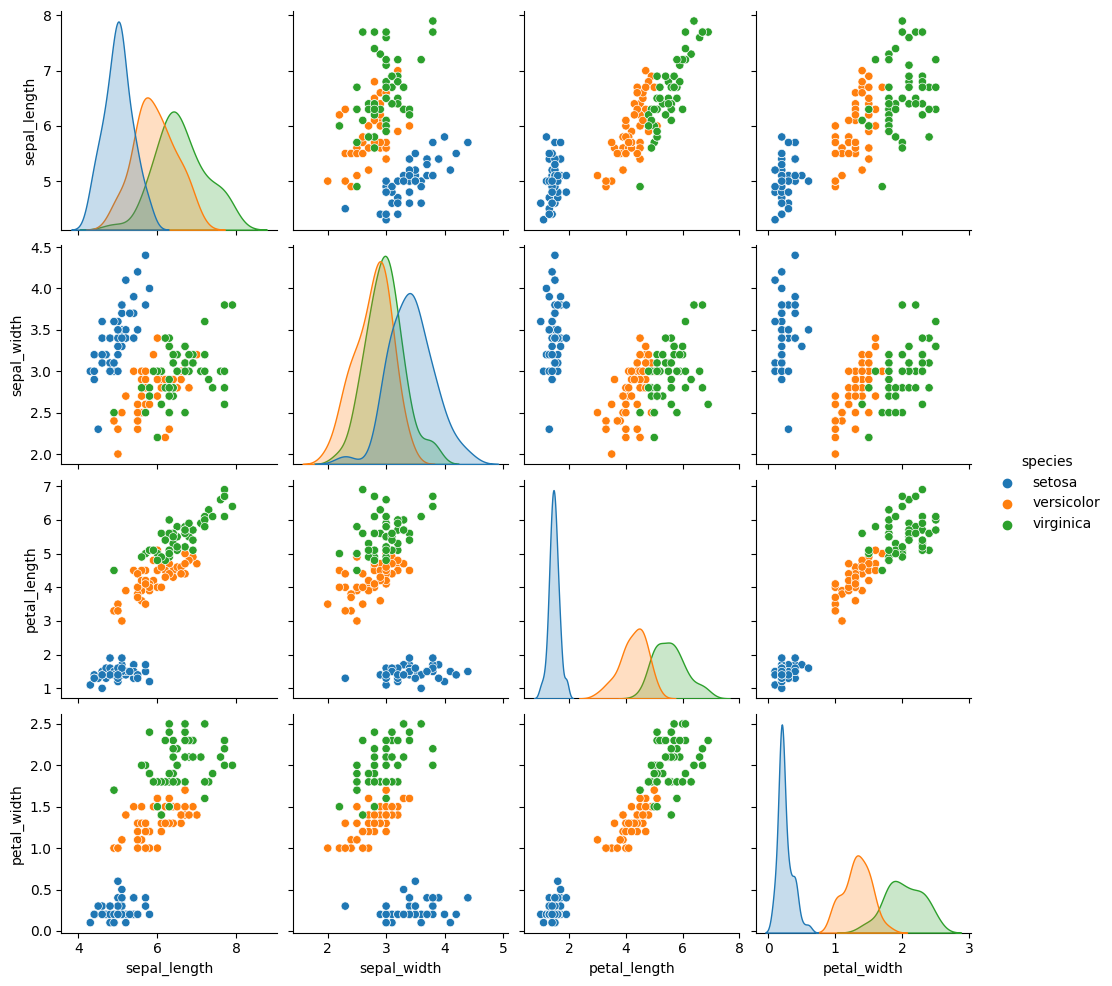

In [10]:
# PAIRPLOT
pairplot(iris, hue="species")

Text(0.5, 1.0, 'Heatmap example (glue)')

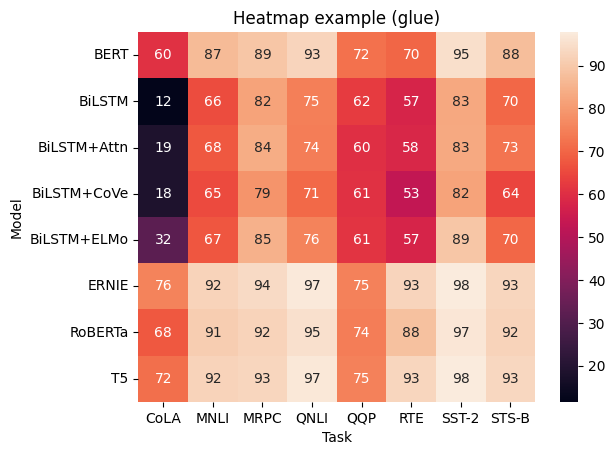

In [11]:
# HEATMAP PLOT
heatmap(glue, annot=True).set_title("Heatmap example (glue)")

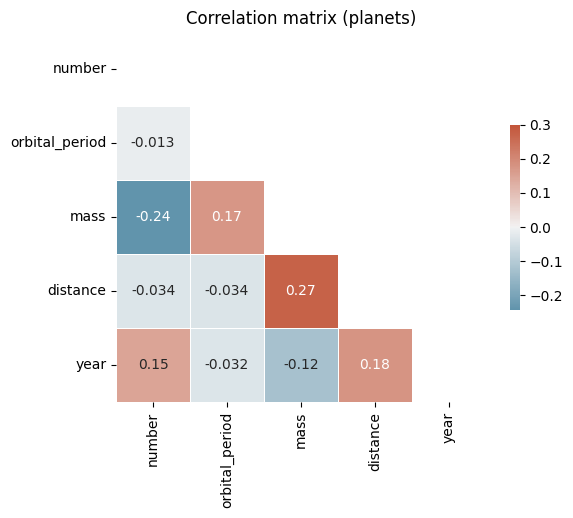

In [14]:
# Correlation matrix (variant of heatmap)
matrix = correlation_matrix(planets)
correlation_matrix_plot = plot_correlation_matrix(matrix, plot_title="Correlation matrix (planets)")